In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [3]:
df=pd.read_csv('../data/Season_2020.csv')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
n = 50
df=df.head(int(len(df)*(n/100)))

In [6]:
n = 50
df2=df.tail(int(len(df)*(n/100)))

Find and eliminate NaNs

In [7]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [8]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [9]:
df.home_win.value_counts(normalize=True)

1    0.509901
0    0.490099
Name: home_win, dtype: float64

In [10]:
df2.home_win.value_counts(normalize=True)

1    0.524752
0    0.475248
Name: home_win, dtype: float64

In [11]:
#df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
101,PIT,32.150000,3.716667,7.083333,3.583333,3.340167,2.783333,8.566667,35.566667,0.215300,...,9.850000,13.600000,6.933333,0.0,48.916667,1.593220,0.491525,0.029217,0.210000,1
102,KCR,33.133333,4.133333,8.083333,3.950000,4.138000,2.866667,8.783333,36.666667,0.238017,...,10.833333,12.866667,6.783333,0.0,52.333333,1.700000,0.500000,0.047217,0.208333,1
103,PHI,32.316667,4.916667,8.266667,4.650000,4.823000,3.666667,8.000000,36.750000,0.249000,...,10.423729,13.169492,6.220339,0.0,48.932203,1.576271,0.322034,-0.028119,-0.679661,1
104,MIL,32.116667,4.250000,7.266667,4.083333,4.239333,3.716667,9.733333,36.616667,0.219300,...,9.250000,11.900000,5.533333,0.0,51.933333,1.183333,0.366667,0.029217,0.463333,0
105,NYM,33.683333,4.850000,9.116667,4.700000,4.760500,3.366667,8.350000,38.033333,0.263500,...,11.666667,13.433333,6.866667,0.0,50.733333,1.593220,0.610169,0.049967,0.185000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,SEA,32.383333,4.300000,7.483333,4.100000,4.110333,3.450000,8.533333,36.583333,0.225967,...,10.533333,14.750000,6.933333,0.0,54.583333,1.466667,0.450000,0.106317,1.306667,1
198,SDP,32.716667,5.316667,8.266667,5.116667,5.237333,3.350000,8.266667,36.966667,0.248250,...,10.933333,13.550000,7.033333,0.0,48.600000,1.830508,0.593220,0.035300,0.310000,1
199,ATL,34.566667,5.800000,9.266667,5.633333,5.734833,3.983333,9.550000,39.066667,0.260583,...,11.400000,12.950000,7.350000,0.0,46.766667,1.561404,0.385965,-0.031333,-0.405000,1
200,CLE,32.650000,4.133333,7.433333,3.900000,4.011333,3.983333,8.616667,37.450000,0.222117,...,11.172414,14.637931,7.568966,0.0,53.465517,1.473684,0.508772,0.039655,0.479310,0


In [12]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,NYM,33.683333,4.850000,9.116667,4.70000,4.760500,3.366667,8.350000,38.033333,0.263500,...,11.416667,13.866667,6.883333,0.0,50.000000,1.833333,0.666667,-0.042900,-1.010000,1
1,TBR,33.016667,4.750000,7.833333,4.50000,4.548667,4.033333,10.166667,37.716667,0.232217,...,11.266667,13.900000,6.783333,0.0,49.100000,2.000000,0.750000,-0.044417,-0.423333,0
2,CHW,34.116667,5.100000,8.900000,4.90000,4.962500,2.983333,9.516667,37.783333,0.253000,...,9.850000,13.600000,6.933333,0.0,48.916667,1.593220,0.491525,0.029217,0.210000,0
3,OAK,31.816667,4.683333,7.200000,4.50000,4.827000,4.000000,8.783333,36.733333,0.223967,...,10.150000,14.983333,7.200000,0.0,46.750000,1.610169,0.372881,0.031567,0.041667,1
4,LAD,33.983051,5.779661,8.661017,5.40678,5.466610,3.779661,7.881356,38.525424,0.252119,...,10.152542,15.186441,7.542373,0.0,48.050847,1.689655,0.603448,-0.026932,-0.352542,1


In [13]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
101,PIT,32.150000,3.716667,7.083333,3.583333,3.340167,2.783333,8.566667,35.566667,0.215300,...,9.850000,13.600000,6.933333,0.0,48.916667,1.593220,0.491525,0.029217,0.210000,1
102,KCR,33.133333,4.133333,8.083333,3.950000,4.138000,2.866667,8.783333,36.666667,0.238017,...,10.833333,12.866667,6.783333,0.0,52.333333,1.700000,0.500000,0.047217,0.208333,1
103,PHI,32.316667,4.916667,8.266667,4.650000,4.823000,3.666667,8.000000,36.750000,0.249000,...,10.423729,13.169492,6.220339,0.0,48.932203,1.576271,0.322034,-0.028119,-0.679661,1
104,MIL,32.116667,4.250000,7.266667,4.083333,4.239333,3.716667,9.733333,36.616667,0.219300,...,9.250000,11.900000,5.533333,0.0,51.933333,1.183333,0.366667,0.029217,0.463333,0
105,NYM,33.683333,4.850000,9.116667,4.700000,4.760500,3.366667,8.350000,38.033333,0.263500,...,11.666667,13.433333,6.866667,0.0,50.733333,1.593220,0.610169,0.049967,0.185000,0


In [14]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [15]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [16]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [17]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

## Feature Selection

In [18]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

### RFECV

In [19]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 75
criterion: gini
Mean Cross-Val Score: 0.46048780487804886
Train Mean Accuracy: 0.6386138613861386
Test Mean Accuracy: 0.6831683168316832
Recall Score: 0.6981132075471698
Precision Score: 0.6981132075471698
F1 score: 0.6981132075471698


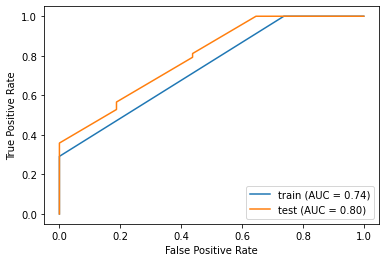

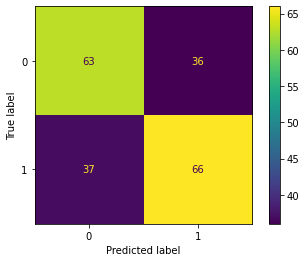

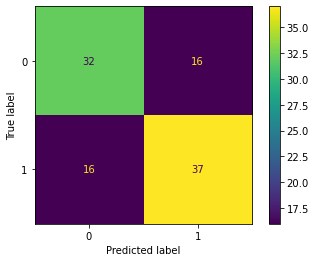

In [20]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [21]:
new_acc(probabilities)

(0.9285714285714286, 39)

### PCA

In [22]:
pca=PCA(n_components=0.9)
train_pca=pca.fit_transform(X_train_scaled)
test_pca=pca.transform(X_test_scaled)

Number of Trees: 110
criterion: gini
Mean Cross-Val Score: 0.48024390243902443
Train Mean Accuracy: 0.6386138613861386
Test Mean Accuracy: 0.6732673267326733
Recall Score: 0.6981132075471698
Precision Score: 0.6851851851851852
F1 score: 0.6915887850467289


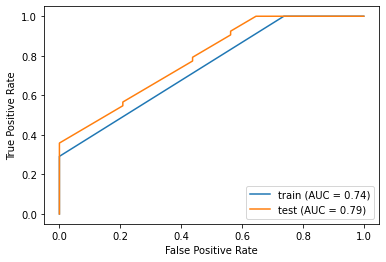

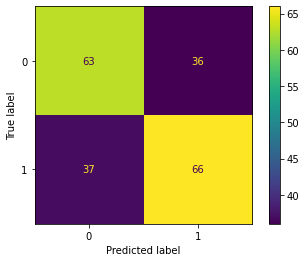

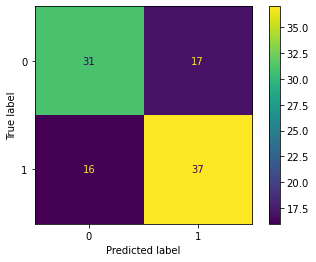

In [23]:
predictions,probabilities=random_forest(train_pca,test_pca,y_train,y_test)

In [24]:
new_acc(probabilities)

(1.0, 36)